
# Colorful Pizza (Percentiles)

* Author: [slothfulwave612](https://twitter.com/slothfulwave612)

* ``mplsoccer``, ``py_pizza`` module helps one to plot pizza charts in a few lines of code.

* The design idea is inspired by [Tom Worville](https://twitter.com/Worville), [Football Slices](https://twitter.com/FootballSlices) and [Soma Zero FC](https://twitter.com/somazerofc)

* We have re-written [Soumyajit Bose's](https://twitter.com/Soumyaj15209314)  pizza chart code to enable greater customisation.

Here we plot a pizza chart with different colors for each slice.


In [3]:
from urllib.request import urlopen

import matplotlib.pyplot as plt
from PIL import Image

from mplsoccer import PyPizza, add_image, FontManager

## Load some fonts
We will use mplsoccer's FontManager to load some fonts from Google Fonts.
We borrowed the FontManager from the excellent
[ridge_map library](https://github.com/ColCarroll/ridge_map).



## Load Image
Load a cropped image of Frenkie de Jong.



In [4]:
URL = "https://api.sofascore.app/api/v1/player/386198/image"
fdj_cropped = Image.open(urlopen(URL))

## Multiple Slice Colors
Here we show an example where the slice colors are set via lists.



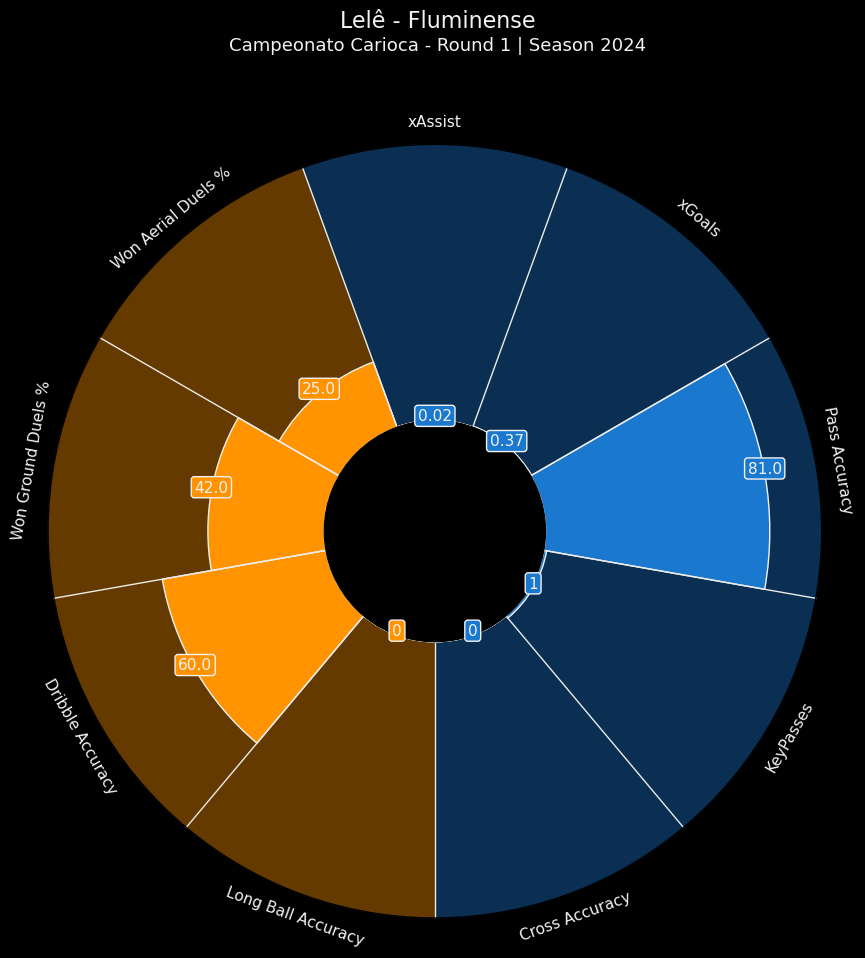

In [15]:
import matplotlib.pyplot as plt


params = [
    "xAssist", "xGoals", "Pass Accuracy",
    "KeyPasses", "Cross Accuracy", "Long Ball Accuracy", "Dribble Accuracy", 
    "Won Ground Duels %", "Won Aerial Duels %"
]

values = [
    0.02, 0.37, 0.81, 1, 0, 0, 0.6, 0.42, 0.25
]

slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 4
text_colors = ["#F2F2F2"] * len(params)  # All text color set to white

baker = PyPizza(
    params=params,
    background_color="#000000",  # Black background
    straight_line_color="#EBEBE9",
    straight_line_lw=1,
    last_circle_lw=2,
    other_circle_lw=0,
    inner_circle_size=40 
)

exclude_scaling = ["KeyPasses", "xGoals", "xAssist"]

# Apply scaling to all parameters except those in exclude_scaling
values_scaled = [value * 100 if param not in exclude_scaling else value for param, value in zip(params, values)]

fig, ax = baker.make_pizza(
    values_scaled,
    figsize=(10, 10.5),
    color_blank_space="same",
    slice_colors=slice_colors,
    value_colors=text_colors,
    value_bck_colors=slice_colors,
    blank_alpha=0.4,
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=1, linewidth=1
    ),
    kwargs_params=dict(
        color="#F2F2F2", fontsize=11,  # White text color
        va="center"
    ),
    kwargs_values=dict(
        color="#F2F2F2", fontsize=11,  # White text color
        zorder=3,
        bbox=dict(
            edgecolor="#F2F2F2", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )
)

fig.text(
    0.515, 0.975, "Lelê - Fluminense", size=16,
    ha="center", color="#F2F2F2"  # White text color
)

fig.text(
    0.515, 0.953,
    "Campeonato Carioca - Round 1 | Season 2024",
    size=13,
    ha="center", color="#F2F2F2"  # White text color
)

CREDIT_1 = "data: SofaScore"
# CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"
'''
fig.text(
    0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9, color="#F2F2F2",
    ha="right"
)'''

plt.savefig("../plots/Radar/rodada01/Lele.png", bbox_inches="tight")

# Display the plot
plt.show()
